In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow.keras.datasets as datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=10000)

In [ ]:
word_index = datasets.imdb.get_word_index()

In [ ]:
word_index.items()

In [ ]:
for i, (key, index) in enumerate(word_index.items()):
    print(f'key:{key} --> index:{index}')
    if i == 20:
        break

In [ ]:
reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()])

In [ ]:
for i, (index, key) in enumerate(reverse_word_index.items()):
    print(f'index:{index} --> key:{key}')
    if i == 20:
        break

In [ ]:
sample = x_train[0]

In [ ]:
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in sample])

In [ ]:
decoded_review

In [ ]:
len(sample)

In [ ]:
len(x_train[1])

In [ ]:
import numpy as np

In [ ]:
np.zeros((2,3))

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.0
        
    return results 

In [ ]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_train[0]

In [ ]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
y_train[:10]

In [ ]:
model = tf.keras.Sequential([    
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
y_val = y_train[:10000]

x_train_partial = x_train[10000:]
y_train_partial = y_train[10000:]

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=2
    ),
    tf.keras.callbacks.TensorBoard()
]

In [ ]:
history = model.fit(x_train_partial, y_train_partial, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val), callbacks=callbacks)

In [ ]:
history_dict = history.history

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoches = range(1, len(loss_values) + 1)

plt.plot(epoches, loss_values, 'b-.', label='Training Loss')
plt.plot(epoches, val_loss_values, 'b-', label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epoches = range(1, len(acc) + 1)

plt.plot(epoches, acc, 'bo', label='Training acc')
plt.plot(epoches, val_acc, 'b', label='Validation acc')
plt.legend()
plt.show()

In [ ]:
from imdb import Imdb

In [ ]:
imdb = Imdb()

In [ ]:
x_train, y_train, x_test, y_test = imdb.prepare_data()

In [ ]:
model = imdb.build_model()

In [ ]:
history_dict = imdb.train(x_train, y_train, model)

In [ ]:
imdb.plot_loss(history_dict)

In [ ]:
imdb.plot_accuracy(history_dict)

In [ ]:
test_results = imdb.evaluate(model, x_test, y_test)
print("Test Results:", test_results)

In [1]:
from reuters import Reuters

In [2]:
reuters = Reuters()

In [3]:
x_train, y_train, x_test, y_test = reuters.prepare_data()

In [4]:
model = reuters.build_model()

In [5]:
history_dict = reuters.train(x_train, y_train, model)

Epoch 1/20
15/15 [==============================] - 1s 36ms/step - loss: 2.8445 - accuracy: 0.5237 - val_loss: 1.9049 - val_accuracy: 0.6238
Epoch 2/20
15/15 [==============================] - 0s 17ms/step - loss: 1.5522 - accuracy: 0.6843 - val_loss: 1.4472 - val_accuracy: 0.6839
Epoch 3/20
15/15 [==============================] - 0s 15ms/step - loss: 1.1602 - accuracy: 0.7447 - val_loss: 1.3681 - val_accuracy: 0.6555
Epoch 4/20
15/15 [==============================] - 0s 14ms/step - loss: 0.9501 - accuracy: 0.7946 - val_loss: 1.2427 - val_accuracy: 0.7206
Epoch 5/20
15/15 [==============================] - 0s 14ms/step - loss: 0.7820 - accuracy: 0.8401 - val_loss: 1.1216 - val_accuracy: 0.7501
Epoch 6/20
15/15 [==============================] - 0s 14ms/step - loss: 0.6415 - accuracy: 0.8671 - val_loss: 1.0241 - val_accuracy: 0.7791
Epoch 7/20
15/15 [==============================] - 0s 17ms/step - loss: 0.5200 - accuracy: 0.8937 - val_loss: 0.9969 - val_accuracy: 0.7863
Epoch 8/20
15

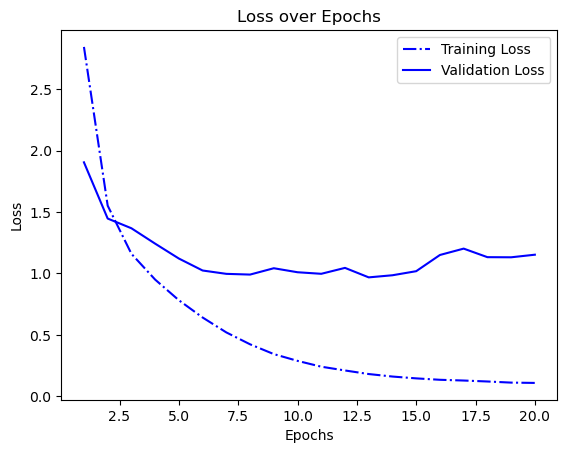

In [7]:
reuters.plot_loss(history_dict)

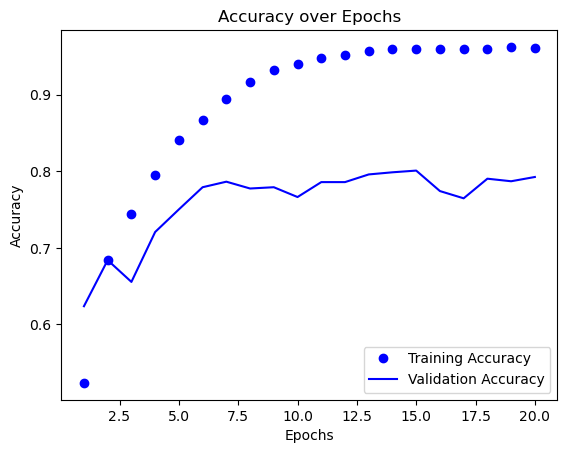

In [8]:
reuters.plot_accuracy(history_dict)

In [9]:
test_results = reuters.evaluate(model, x_test, y_test)
print("Test Results:", test_results)

71/71 [==============================] - 0s 2ms/step - loss: 1.1932 - accuracy: 0.7805
Test Results: [1.1932016611099243, 0.7804986834526062]
